In [43]:
import numpy as np     # for numerical computations 
import pandas as pd    # for data manipulation and analysis
import matplotlib.pyplot as plt   #  for creating visualizations and show images 
from tensorflow.keras.models import Sequential   # represents a linear stack of layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # used as layers in convolutional neural network CNN
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # used for real-time data augmentation and preprocessing of image data during training
from tensorflow.keras.preprocessing import image # provides functions for loading and manipulating images

In [38]:
# generate batches of tensor image data with real-time data augmentation
datagen=ImageDataGenerator(rescale=1./255,rotation_range=30,horizontal_flip=True)
# ImageDataGenerator generates batches of augmented image data
# rescale=1./255 scales the pixel values of the images in the range [0, 255] to the range [0, 1]
# rotation_range=30 specifies that the images can be randomly rotated by a maximum of 30 degrees during augmentation.
# horizontal_flip=True indicates that the images can be horizontally flipped randomly during augmentation.
training_set=datagen.flow_from_directory(r"Project_Dataset\Training",
                                         target_size=(120,120),
                                         batch_size=300,
                                         class_mode='categorical')
test_set=datagen.flow_from_directory(r"Project_Dataset\Testing",
                                         target_size=(120,120),
                                         batch_size=300,
                                         class_mode='categorical')
# target_size=(120, 120) specifies the size to which the images should be resized during preprocessing.
# batch_size=300 determines the number of images to include in each batch.
# class_mode='categorical' indicates that the labels for the images are categorical (one-hot encoded).
class_labels={0:"Early_Blight",1:"Healthy",2:"Late_Blight"}
# class_labels is a dictionary that maps the class indices (0, 1, 2) to their corresponding 
# class labels ("Early_Blight", "Healthy", "Late_Blight").

Found 3251 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [1]:
model=Sequential()
model.add(Conv2D(32,(3,3), input_shape=(120,120,3)))
# total parameters = (no of filters * parameters of filters)+bias for each filter
# 60 * (3*3*3) + 60 = 1680
# (118, 118, 60) => because 1 filter convoluting a 120x120 image produces a feature matrix of 118x118 so 60 such feature matrices
model.add(MaxPooling2D(2,2))
# halfs the image size w/o loss in information
# 2,2 reduces the size of the image to half. the no of parameters is zero here because there is 
# no learning happening in this step and it is just an operation.
model.add(Conv2D(64,(3,3)))
# no of parameters here is 64 filters of size 3*3 applied to each feature map which are 60 in total 
# and adding bias for each filter i.e. (64*3*3*60)+64=34624 
model.add(MaxPooling2D(2,2))
# halfs the image size w/o loss in information
# 2,2 reduces the size of the image to half. the no of parameters is zero here because there is 
# no learning happening in this step and it is just an operation.
model.add(Conv2D(128,(3,3)))
# no of parameters here is 128 filters of size 3*3 applied to each feature map which are 64 in total 
# and adding bias for each filter i.e. (128*3*3*64)+128=34624 
model.add(MaxPooling2D(2,2))
# halfs the image size w/o loss in information
# 2,2 reduces the size of the image to half. the no of parameters is zero here because there is 
# no learning happening in this step and it is just an operation.
model.add(Flatten())
# reshapes the 3D feature maps into a 1D vector => 128*13*13=21632 size of the array
# the no of parameters is zero here because there is no learning happening in this step and it is just an operation.
model.add(Dense(128,activation='relu'))
# size of previous layer *size of current layer +bias of current layer => 21632*128+128=2769024
model.add(Dense(3,activation='softmax'))
# size of previous layer *size of current layer +bias of current layer => 128*3+3=387
model.summary()

NameError: name 'Sequential' is not defined

In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
# optimizer='adam' specifies the optimizer algorithm to be used during training. 
# loss='categorical_crossentropy' sets the loss function => suitable for multi-class classification problems where the labels are one-hot encoded.
# metrics=['accuracy'] specifies the evaluation metric to be used => accuracy is chosen as the metric to monitor the model's performance.
model.fit(training_set,epochs=60,validation_data=test_set)
# training_set is the data generator object that generates batches of training data.
# epochs=60 indicates the number of times the model will iterate over the entire training dataset during training.
# validation_data=test_set specifies the data generator object to be used for validation during training. 
# The model's performance on the validation set will be evaluated after each epoch.

Epoch 1/60
11/11 [==============================] - 32s 3s/step - loss: 1.7066 - accuracy: 0.3660 - val_loss: 1.0674 - val_accuracy: 0.3926
Epoch 2/60
11/11 [==============================] - 29s 3s/step - loss: 1.0182 - accuracy: 0.4875 - val_loss: 0.9749 - val_accuracy: 0.5383
Epoch 3/60
11/11 [==============================] - 29s 3s/step - loss: 0.9566 - accuracy: 0.5500 - val_loss: 0.9228 - val_accuracy: 0.5901
Epoch 4/60
11/11 [==============================] - 29s 3s/step - loss: 0.9338 - accuracy: 0.5638 - val_loss: 0.8970 - val_accuracy: 0.5802
Epoch 5/60
11/11 [==============================] - 29s 3s/step - loss: 0.9206 - accuracy: 0.5681 - val_loss: 0.8813 - val_accuracy: 0.6148
Epoch 6/60
11/11 [==============================] - 29s 3s/step - loss: 0.8921 - accuracy: 0.6004 - val_loss: 0.9094 - val_accuracy: 0.5284
Epoch 7/60
11/11 [==============================] - 29s 3s/step - loss: 0.8668 - accuracy: 0.5974 - val_loss: 0.9141 - val_accuracy: 0.5457
Epoch 8/60
11/11 [==

1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight


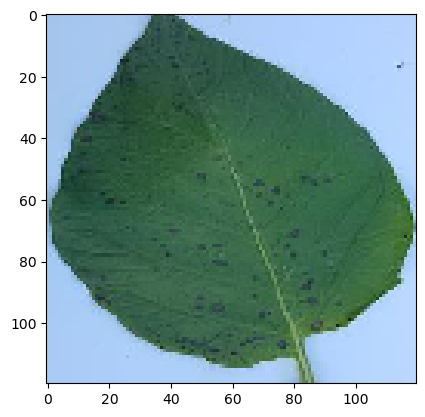

In [44]:
img = image.load_img(r"Project_Dataset\Validation\Early_Blight\Early_Blight_1.jpg",target_size=(120,120,3))
# target_size=(120, 120, 3) specifies the size of the image => (120, 120) with 3 channels (RGB)
plt.imshow(img)

test_img=np.asarray(img)
# Converts the image to a numpy array
test_img.shape

test_img=test_img.reshape(1,120,120,3)
# test_img.reshape(1, 120, 120, 3) reshapes the array to have a batch dimension of 1, to match the expected 
# shape of the input data for the model.
yhat=model.predict(test_img)
# yhat contains the predicted probabilities for each class
predicted_class = np.argmax(yhat[0])
# np.argmax finds the index of the class with the highest probability.
# predicted_class stores the index of the predicted class with the highest probability.
predicted_labels=class_labels[predicted_class]
# class_labels is the dictionary which maps class indices to their corresponding labels.
# predicted_label retrieves the predicted label from class_labels based on the predicted_class.
print("Predicted Label is: ",predicted_labels)

1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Healthy


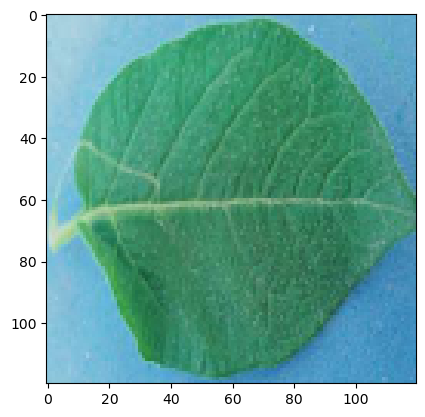

In [39]:
img = image.load_img(r"Project_Dataset\Validation\Healthy\Healthy_5.jpg",target_size=(120,120,3))
plt.imshow(img)

test_img=np.asarray(img)
test_img.shape

test_img=test_img.reshape(1,120,120,3)
yhat=model.predict(test_img)
predicted_class = np.argmax(yhat[0])
predicted_labels=class_labels[predicted_class]
print("Predicted Label is: ",predicted_labels)

1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight


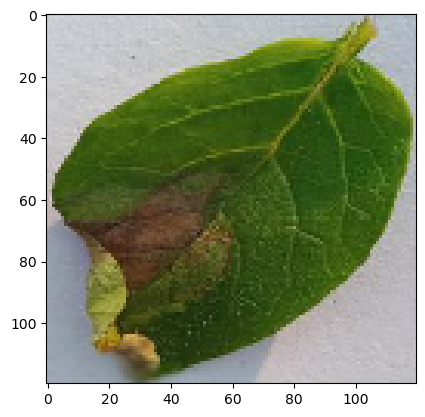

In [41]:
img = image.load_img(r"Project_Dataset\Validation\Late_Blight\Late_Blight_3.jpg",target_size=(120,120,3))
plt.imshow(img)

test_img=np.asarray(img)
test_img.shape

test_img=test_img.reshape(1,120,120,3)
yhat=model.predict(test_img)
predicted_class = np.argmax(yhat[0])
predicted_labels=class_labels[predicted_class]
print("Predicted Label is: ",predicted_labels)

In [45]:
# to check the class of all the leaves a for loop is used to iterate over all the 164 images 
for i in range(1,164):
    img = image.load_img(f"Project_Dataset\Validation\Early_Blight\Early_Blight_{i}.jpg",target_size=(120,120,3))
    test_img=np.asarray(img)
    test_img=test_img.reshape(1,120,120,3)
    yhat=model.predict(test_img)
    predicted_class = np.argmax(yhat[0])
    predicted_labels=class_labels[predicted_class]
    print("Predicted Label is: ",predicted_labels)

1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 26ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Pr

In [48]:
for i in range(1,60):
    img = image.load_img(f"Project_Dataset\Validation\Healthy\Healthy_{i}.jpg",target_size=(120,120,3))
    test_img=np.asarray(img)
    test_img=test_img.reshape(1,120,120,3)
    pre1.append(model.predict(test_img))
    yhat=model.predict(test_img)
    predicted_class = np.argmax(yhat[0])
    predicted_labels=class_labels[predicted_class]
    print("Predicted Label is: ",predicted_labels)

1/1 [==============================] - 0s 28ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Healthy
1/1 [=======================

In [49]:
for i in range(1,71):
    img = image.load_img(f"Project_Dataset\Validation\Late_Blight\Late_Blight_{i}.jpg",target_size=(120,120,3))
    test_img=np.asarray(img)
    test_img=test_img.reshape(1,120,120,3)
    yhat=model.predict(test_img)
    predicted_class = np.argmax(yhat[0])
    predicted_labels=class_labels[predicted_class]
    print("Predicted Label is: ",predicted_labels)

1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 24ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 26ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 26ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 26ms/step
Predicted Lab